 RUGOGAMU NOELA   COMPANY PROJECT ANALYSIS

1. IMPORTING REQUIRED PACKAGES

In [1]:
import pandas as pd #For handling data
import numpy as np # For calculations and operations
import seaborn as sns # For creation of beautiful visualisations
import matplotlib.pyplot as plt #For easy customisation of plots and graphs
import plotly.express as px # For interactive visualisations

2. LOADING THE DATASET

In [2]:
#Importing the dataset
df = pd.read_excel('Companies - Analysis.xlsx', engine = 'openpyxl')

3. UNDERSTANDING THE DATASET

In [3]:
#Viewing the first 5 rows of the dataset
df.head()

,Date of Registration,Company Type,Unnamed: 2,Registration Status,Country Of Incorporation,Nominal Share Capital,Number Of Shares,Re Registration Date,Last Year Company Filed Returns
0,2023-05-22 10:11:24.692,single-member-company,NaN,Registered,Uganda,5000000.0,100.0,NaT,2024.0
1,2023-04-13 08:39:42.952,private-company-limited-by-shares,NaN,Registered,NaN,2000000.0,100.0,NaT,2024.0
2,2025-02-13 07:19:01.993,private-company-limited-by-guarantee-without-s...,NaN,Registered,Uganda,NaN,NaN,NaT,0.0
3,2025-01-29 11:07:40.697,private-company-limited-by-guarantee-without-s...,NaN,Registered,Uganda,NaN,NaN,NaT,0.0
4,2023-05-17 09:55:27.838,private-company-limited-by-shares,NaN,Registered,Uganda,2000000.0,100.0,NaT,NaN


In [4]:
#viewing the shape of the data
df.shape

(134338, 9)

In [5]:
#Viewing te data types in the data
df.dtypes

Date of Registration               datetime64[ns]
Company Type                               object
Unnamed: 2                                float64
Registration Status                        object
Country Of Incorporation                   object
Nominal Share Capital                     float64
Number Of Shares                          float64
Re Registration Date               datetime64[ns]
Last Year Company Filed Returns           float64
dtype: object

In [6]:
#viewing the column names
df.columns

Index(['Date of Registration', 'Company Type', 'Unnamed: 2',
       'Registration Status', 'Country Of Incorporation',
       'Nominal Share Capital', 'Number Of Shares', 'Re Registration Date',
       'Last Year Company Filed Returns'],
      dtype='object')

In [7]:
#displaying the datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134338 entries, 0 to 134337
Data columns (total 9 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Date of Registration             134338 non-null  datetime64[ns]
 1   Company Type                     134338 non-null  object        
 2   Unnamed: 2                       0 non-null       float64       
 3   Registration Status              134338 non-null  object        
 4   Country Of Incorporation         125870 non-null  object        
 5   Nominal Share Capital            110498 non-null  float64       
 6   Number Of Shares                 110498 non-null  float64       
 7   Re Registration Date             1 non-null       datetime64[ns]
 8   Last Year Company Filed Returns  126716 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 9.2+ MB


3. IDENTIFYING AND HANDLING MISSING VALUES

In [8]:
#Identifying the number of null values in each column
df.isna().sum()

Date of Registration                    0
Company Type                            0
Unnamed: 2                         134338
Registration Status                     0
Country Of Incorporation             8468
Nominal Share Capital               23840
Number Of Shares                    23840
Re Registration Date               134337
Last Year Company Filed Returns      7622
dtype: int64

In [9]:
# Since the column we're dropping has no column title we are gonna use it's index to identify it
df1 = df.drop(df.columns[2],axis=1)

In [10]:
#confirming that the column has been dropped
df1.head()

,Date of Registration,Company Type,Registration Status,Country Of Incorporation,Nominal Share Capital,Number Of Shares,Re Registration Date,Last Year Company Filed Returns
0,2023-05-22 10:11:24.692,single-member-company,Registered,Uganda,5000000.0,100.0,NaT,2024.0
1,2023-04-13 08:39:42.952,private-company-limited-by-shares,Registered,NaN,2000000.0,100.0,NaT,2024.0
2,2025-02-13 07:19:01.993,private-company-limited-by-guarantee-without-s...,Registered,Uganda,NaN,NaN,NaT,0.0
3,2025-01-29 11:07:40.697,private-company-limited-by-guarantee-without-s...,Registered,Uganda,NaN,NaN,NaT,0.0
4,2023-05-17 09:55:27.838,private-company-limited-by-shares,Registered,Uganda,2000000.0,100.0,NaT,NaN


In [11]:
#We're gonna work on the Country of Incorporation column next and this is a categorical value. 
#So we're gonna fill in the missing values using the mode of the column
df1['Country Of Incorporation'] = df1['Country Of Incorporation'].fillna(df1['Country Of Incorporation'].mode()[0])

In [12]:
#Checking if the missing values have  been filled
df1.isna().sum()

Date of Registration                    0
Company Type                            0
Registration Status                     0
Country Of Incorporation                0
Nominal Share Capital               23840
Number Of Shares                    23840
Re Registration Date               134337
Last Year Company Filed Returns      7622
dtype: int64

In [13]:
# VISUALIZATION OF THE NORMINAL SHARE CAPITAL REALLY LOADED FOR AGES AND AGES SO I CHOSE TO USE THE KNOWLEDGE OF 
#DISTRIBUTION OF THESE COLUMNS TAT I HAD ALREADY ATTAINED FROM MY R SCRIPT ANALYSIS
df1['Nominal Share Capital'] = df1['Nominal Share Capital'].fillna(df1['Nominal Share Capital'].median)


In [14]:
#Checking if the missing values have  been filled
df1.isna().sum()

Date of Registration                    0
Company Type                            0
Registration Status                     0
Country Of Incorporation                0
Nominal Share Capital                   0
Number Of Shares                    23840
Re Registration Date               134337
Last Year Company Filed Returns      7622
dtype: int64

In [15]:
# VISUALIZATION OF THE NUMBER OF SHARES REALLY LOADED FOR AGES AND AGES SO I CHOSE TO USE THE KNOWLEDGE OF 
#DISTRIBUTION OF THESE COLUMNS TAT I HAD ALREADY ATTAINED FROM MY R SCRIPT ANALYSIS
df1['Number Of Shares'] = df1['Number Of Shares'].fillna(df1['Number Of Shares'].median)


In [16]:
#Checking if the missing values have  been filled
df1.isna().sum()

Date of Registration                    0
Company Type                            0
Registration Status                     0
Country Of Incorporation                0
Nominal Share Capital                   0
Number Of Shares                        0
Re Registration Date               134337
Last Year Company Filed Returns      7622
dtype: int64

In [17]:
#VISUALIZATION OF THE RE REGISTRATION DATE REALLY LOADED FOR AGES AND AGES SO I CHOSE TO USE THE KNOWLEDGE OF 
#DISTRIBUTION OF THESE COLUMNS TAT I HAD ALREADY ATTAINED FROM MY R SCRIPT ANALYSIS
df1['Re Registration Date'] = df1['Re Registration Date'].fillna(df1['Re Registration Date'].mode()[0])


In [18]:
#Checking if the missing values have  been filled
df1.isna().sum()

Date of Registration                  0
Company Type                          0
Registration Status                   0
Country Of Incorporation              0
Nominal Share Capital                 0
Number Of Shares                      0
Re Registration Date                  0
Last Year Company Filed Returns    7622
dtype: int64

In [19]:
#VISUALIZATION OF THE RE REGISTRATION DATE REALLY LOADED FOR AGES AND AGES SO I CHOSE TO USE THE KNOWLEDGE OF 
#DISTRIBUTION OF THESE COLUMNS TAT I HAD ALREADY ATTAINED FROM MY R SCRIPT ANALYSIS
df1['Last Year Company Filed Returns'] = df1['Last Year Company Filed Returns'].fillna(df1['Last Year Company Filed Returns'].median())


In [20]:
#Checking if the missing values have  been filled
df1.isna().sum()

Date of Registration               0
Company Type                       0
Registration Status                0
Country Of Incorporation           0
Nominal Share Capital              0
Number Of Shares                   0
Re Registration Date               0
Last Year Company Filed Returns    0
dtype: int64

DATA TRANSFORMATION

In [21]:
df1.dtypes

Date of Registration               datetime64[ns]
Company Type                               object
Registration Status                        object
Country Of Incorporation                   object
Nominal Share Capital                      object
Number Of Shares                           object
Re Registration Date               datetime64[ns]
Last Year Company Filed Returns           float64
dtype: object

In [22]:
df1['Nominal Share Capital'] = pd.to_numeric(df1['Nominal Share Capital'], errors='coerce')
df1['Last Year Company Filed Returns'] = pd.to_numeric(df1['Last Year Company Filed Returns'], errors='coerce')
df1['Number Of Shares'] = pd.to_numeric(df1['Number Of Shares'], errors='coerce')

In [23]:
# Saving df1 to an Excel file
df1.to_excel("cleaned_companies_data.xlsx", index=False)


DATA VISUALIZATION...THIS IS WHERE I BRING MY INSIGHTS TO LIFE!!

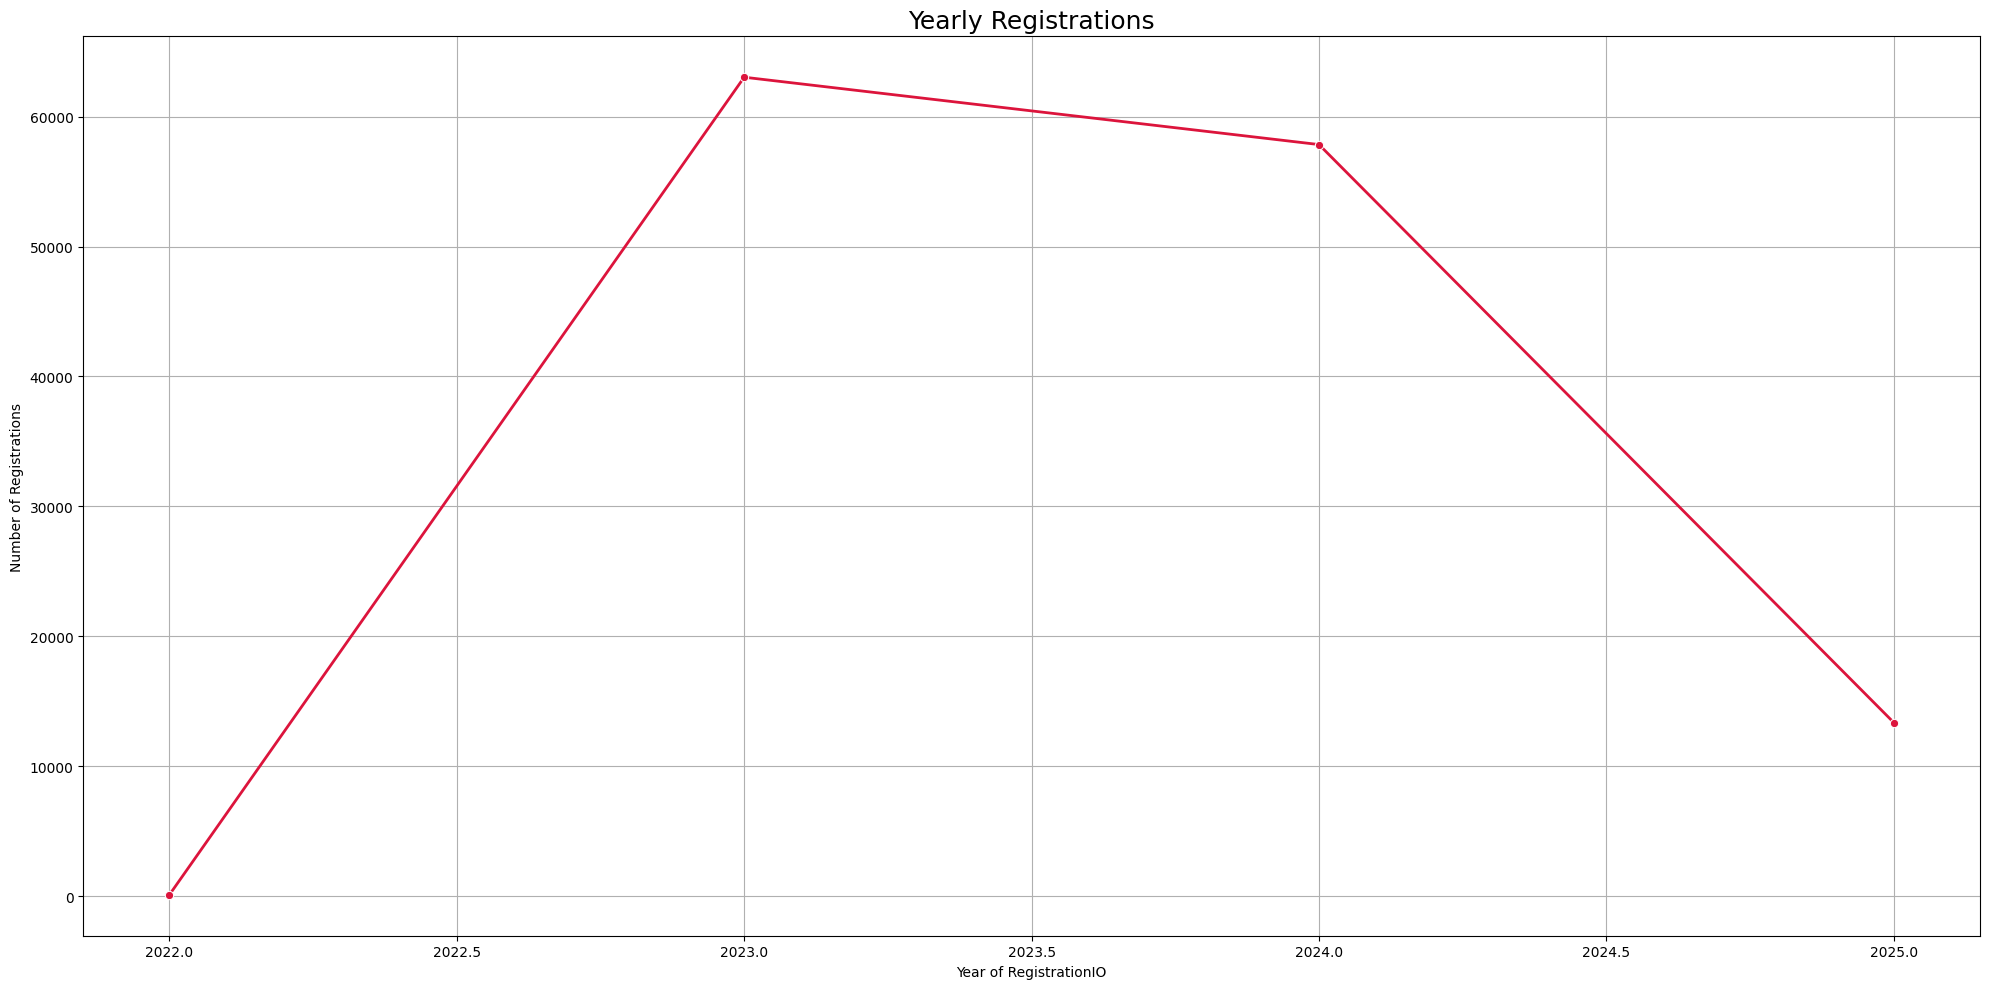

In [24]:
yearly_counts = df1['Date of Registration'].dt.year.value_counts().sort_index()

plt.figure(figsize=(20,10))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='crimson', linewidth=2)
plt.title('Yearly Registrations', fontsize=18)
plt.xlabel('Year of RegistrationIO')
plt.ylabel('Number of Registrations')
plt.grid(True)
plt.tight_layout()
plt.show()

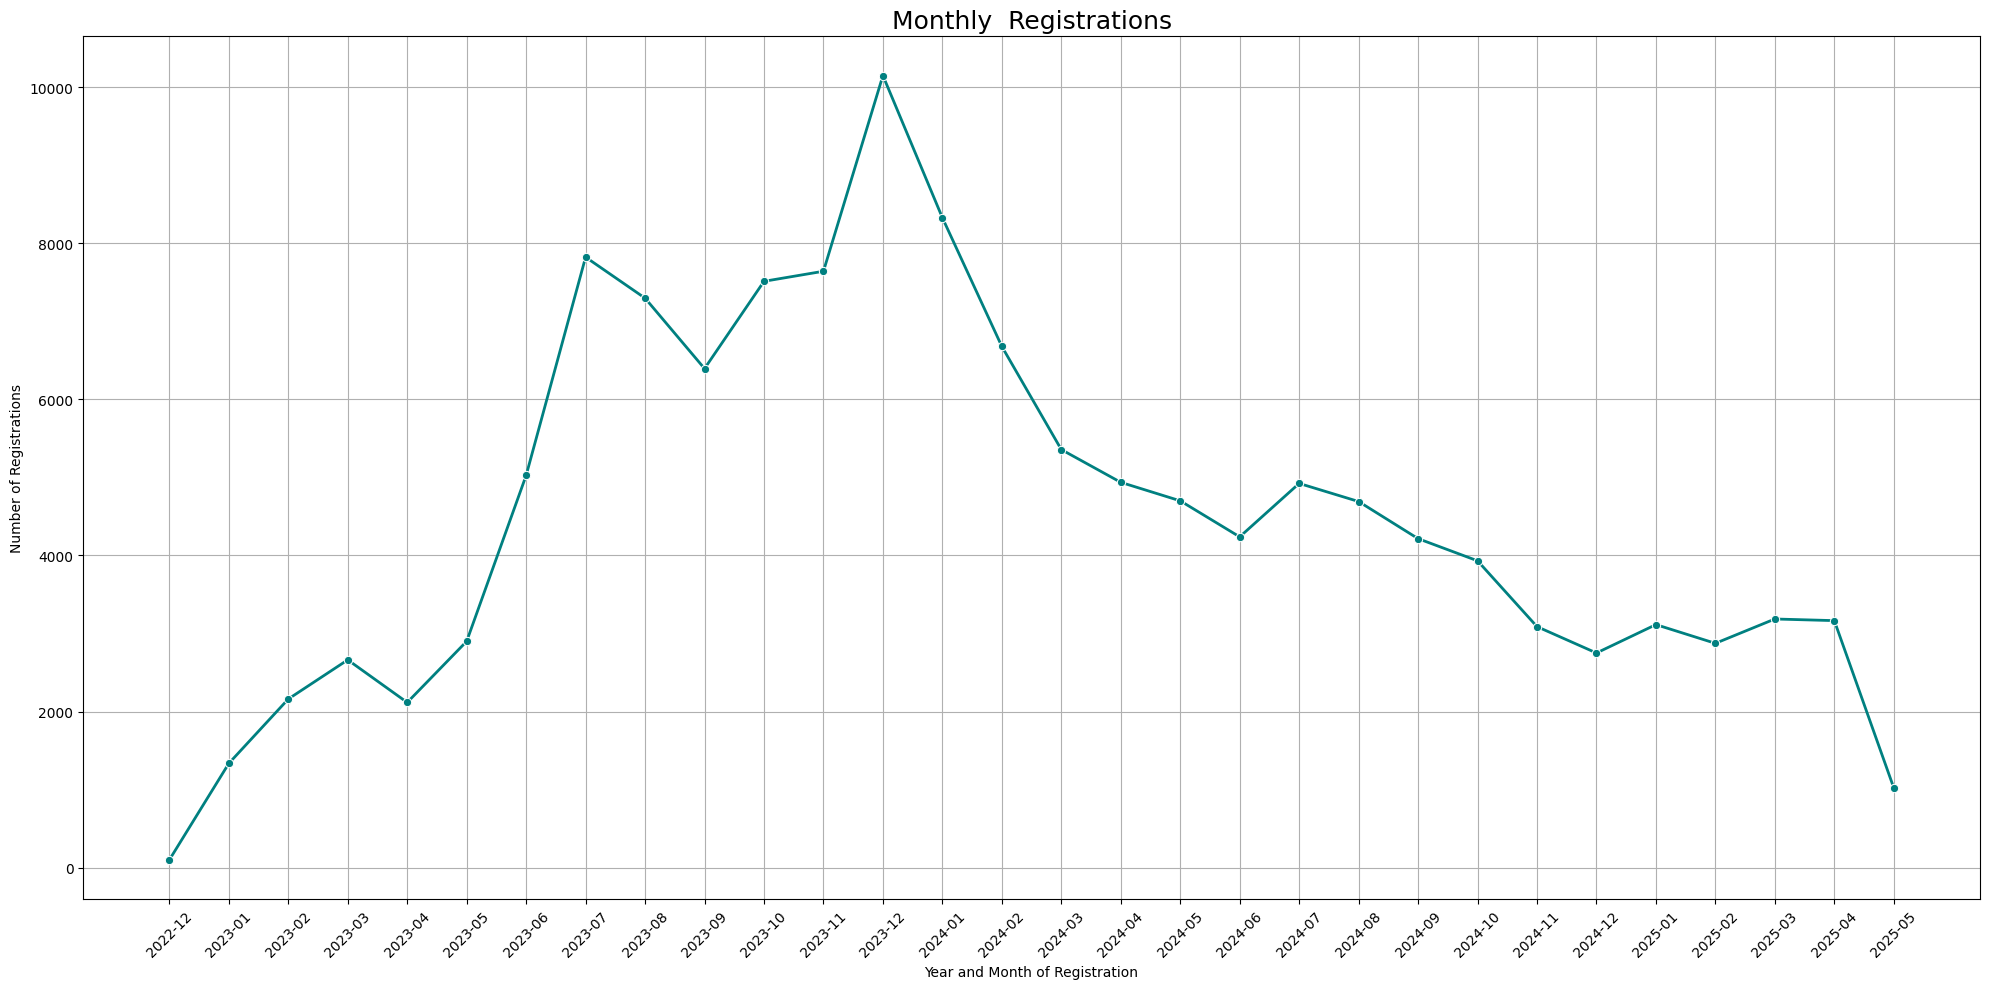

In [25]:
monthly_counts = df1['Date of Registration'].dt.to_period('M').astype(str).value_counts().sort_index()

plt.figure(figsize=(20, 10))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o', color='teal', linewidth=2)
plt.title('Monthly  Registrations', fontsize=18)
plt.xlabel('Year and Month of Registration')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\opg\AppData\Local\Temp\ipykernel_11996\332789496.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x="Company Type", palette="pastel", order=df["Company Type"].value_counts().index)


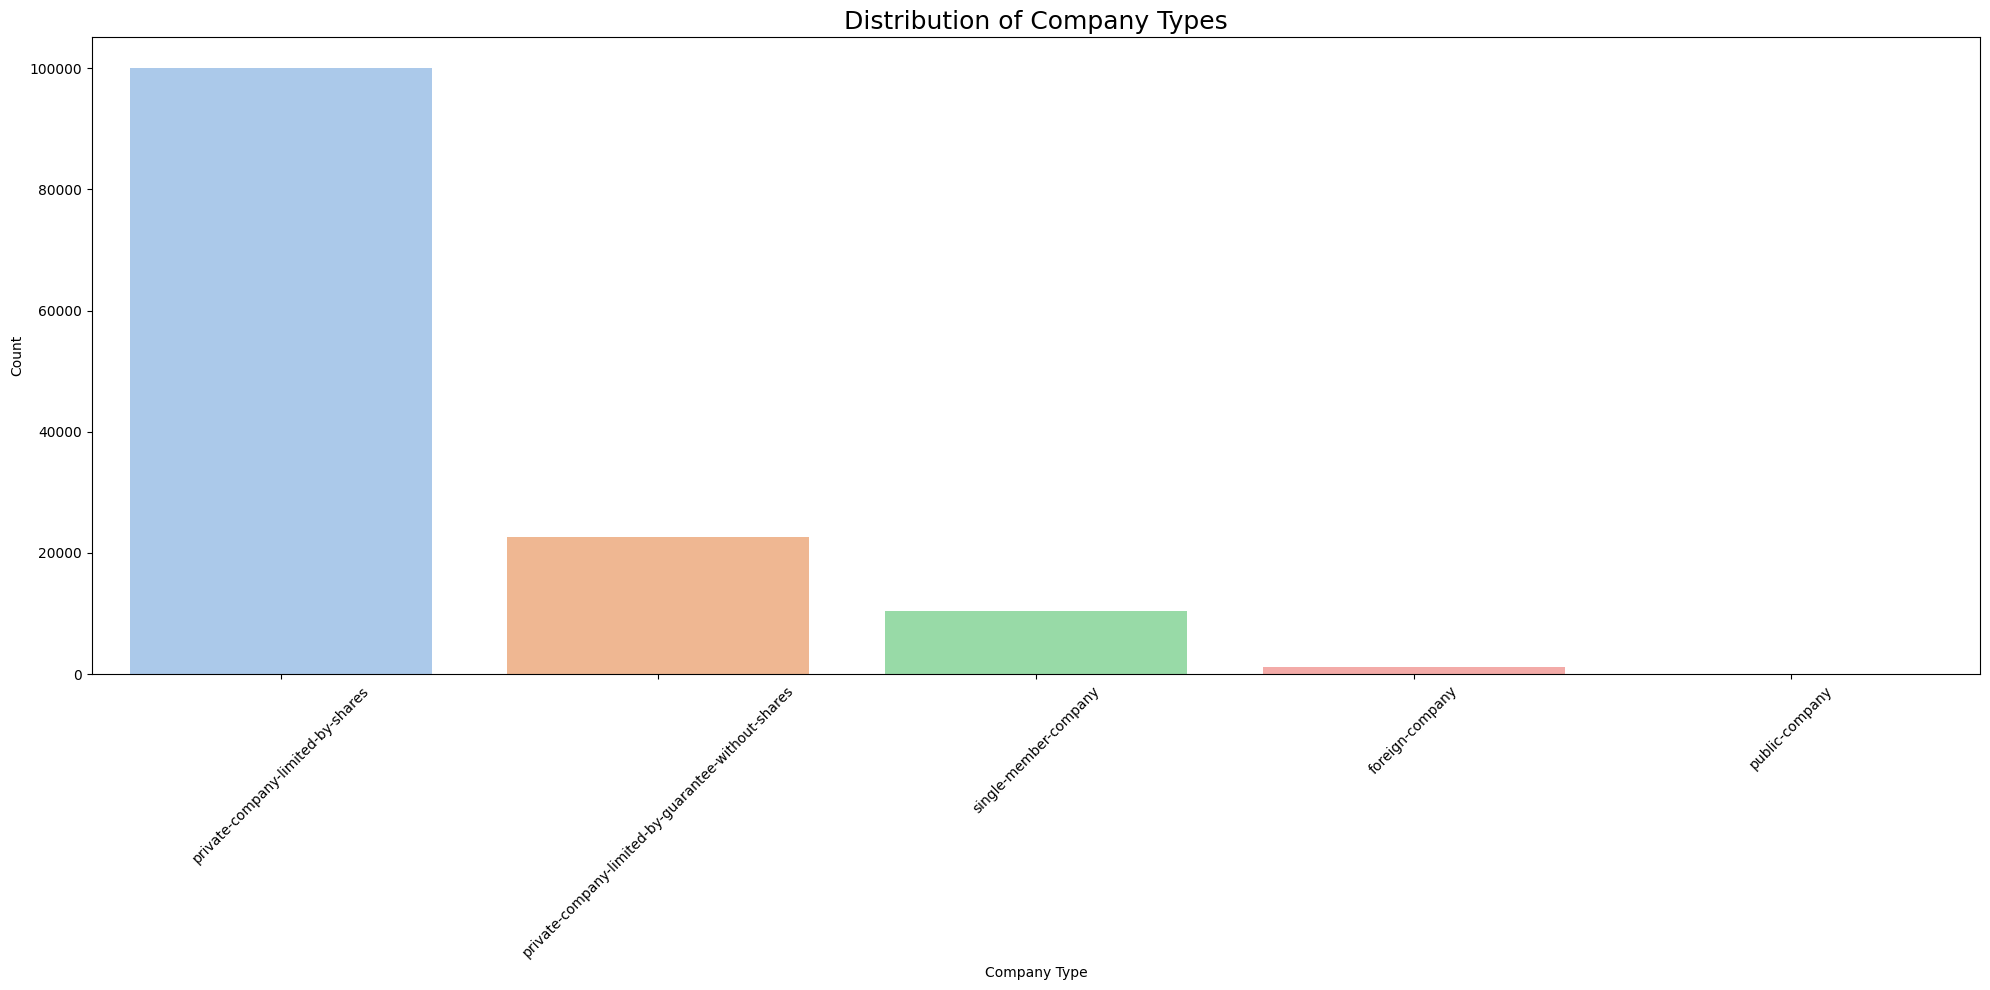

In [26]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df1, x="Company Type", palette="pastel", order=df["Company Type"].value_counts().index)

plt.title("Distribution of Company Types", fontsize=18)
plt.xlabel("Company Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\opg\AppData\Local\Temp\ipykernel_11996\957088248.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x="Registration Status", palette="muted")


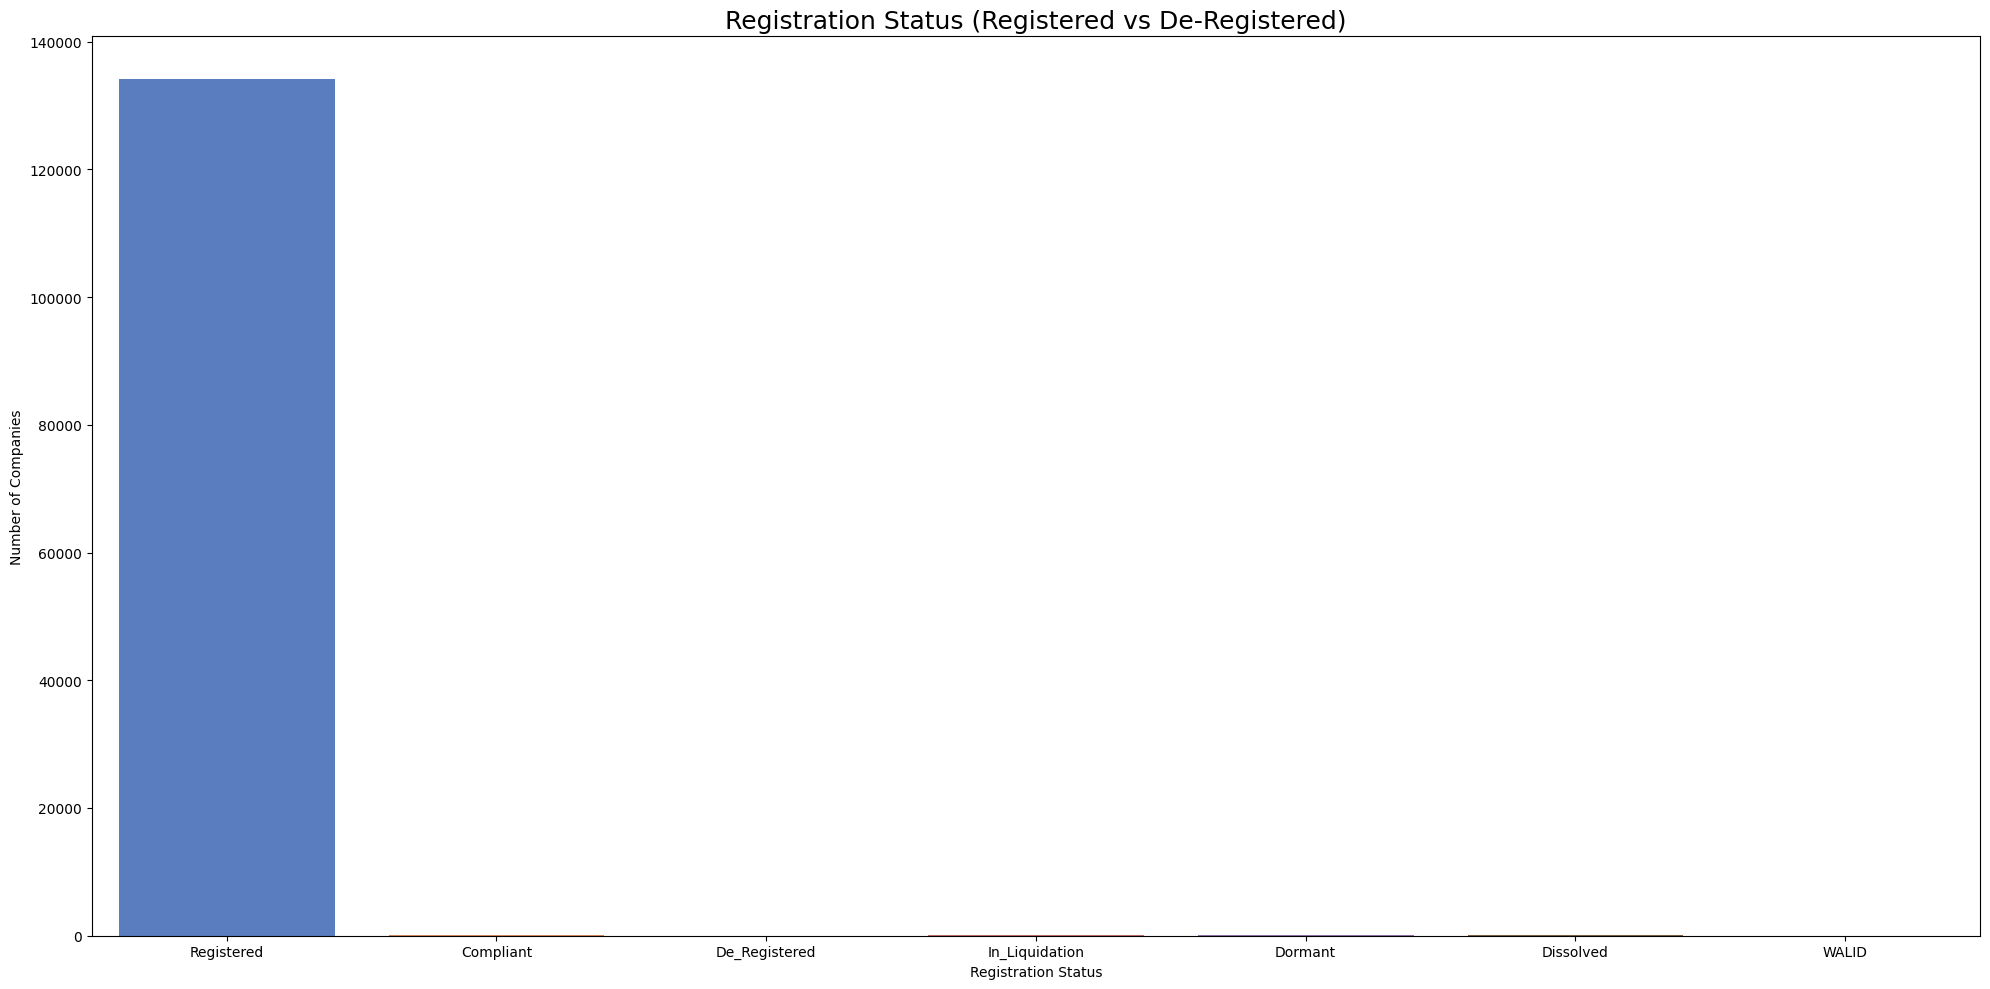

In [27]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df1, x="Registration Status", palette="muted")

plt.title("Registration Status (Registered vs De-Registered)", fontsize=18)
plt.xlabel("Registration Status")
plt.ylabel("Number of Companies")
plt.tight_layout()
plt.show()


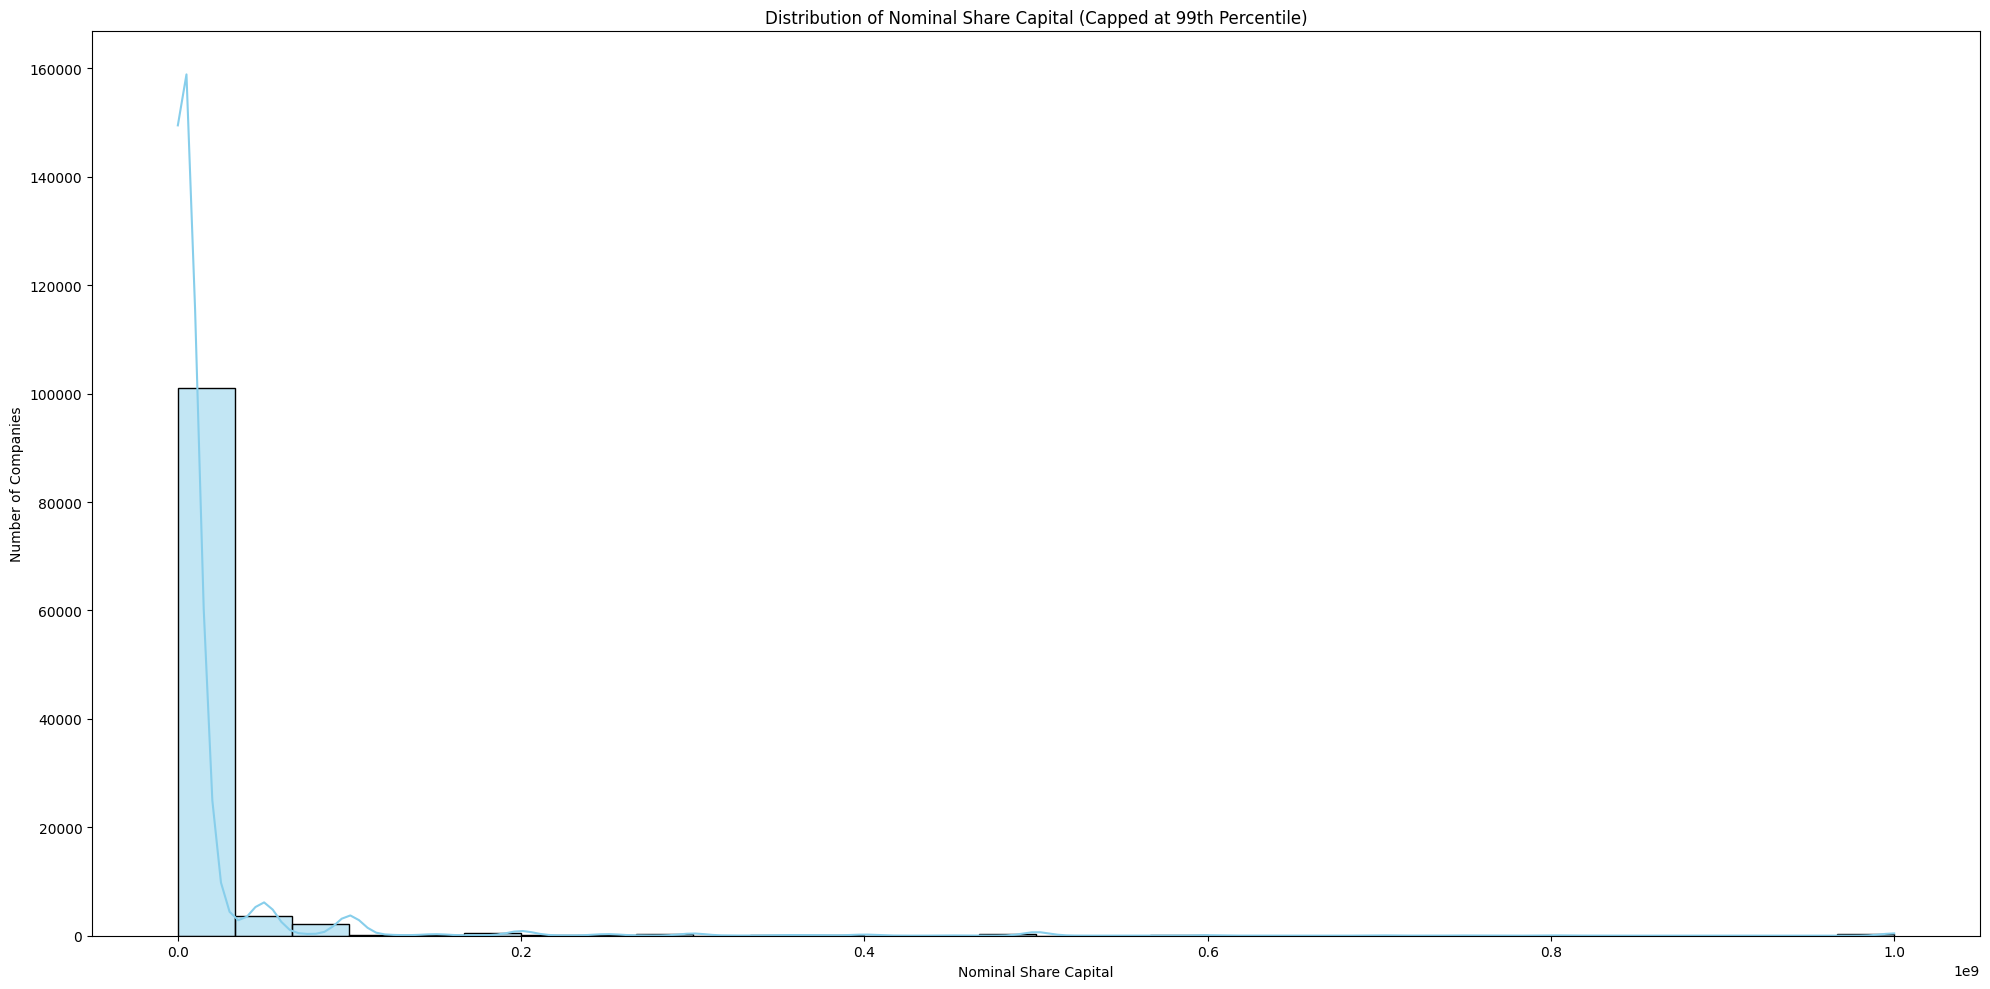

In [28]:
# Capping extreme values at 99th percentile for better visuals because the distribution was highly skewed which
# made the first plot i attempted to create look like a single bar.
cap = df1["Nominal Share Capital"].quantile(0.99)
df_capped = df1[df1["Nominal Share Capital"] <= cap]


plt.figure(figsize=(20, 10))
sns.histplot(data=df_capped, x="Nominal Share Capital", kde=True, bins=30, color="skyblue")
plt.title("Distribution of Nominal Share Capital (Capped at 99th Percentile)")
plt.xlabel("Nominal Share Capital")
plt.ylabel("Number of Companies")
plt.tight_layout()

C:\Users\opg\AppData\Local\Temp\ipykernel_11996\2591617268.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




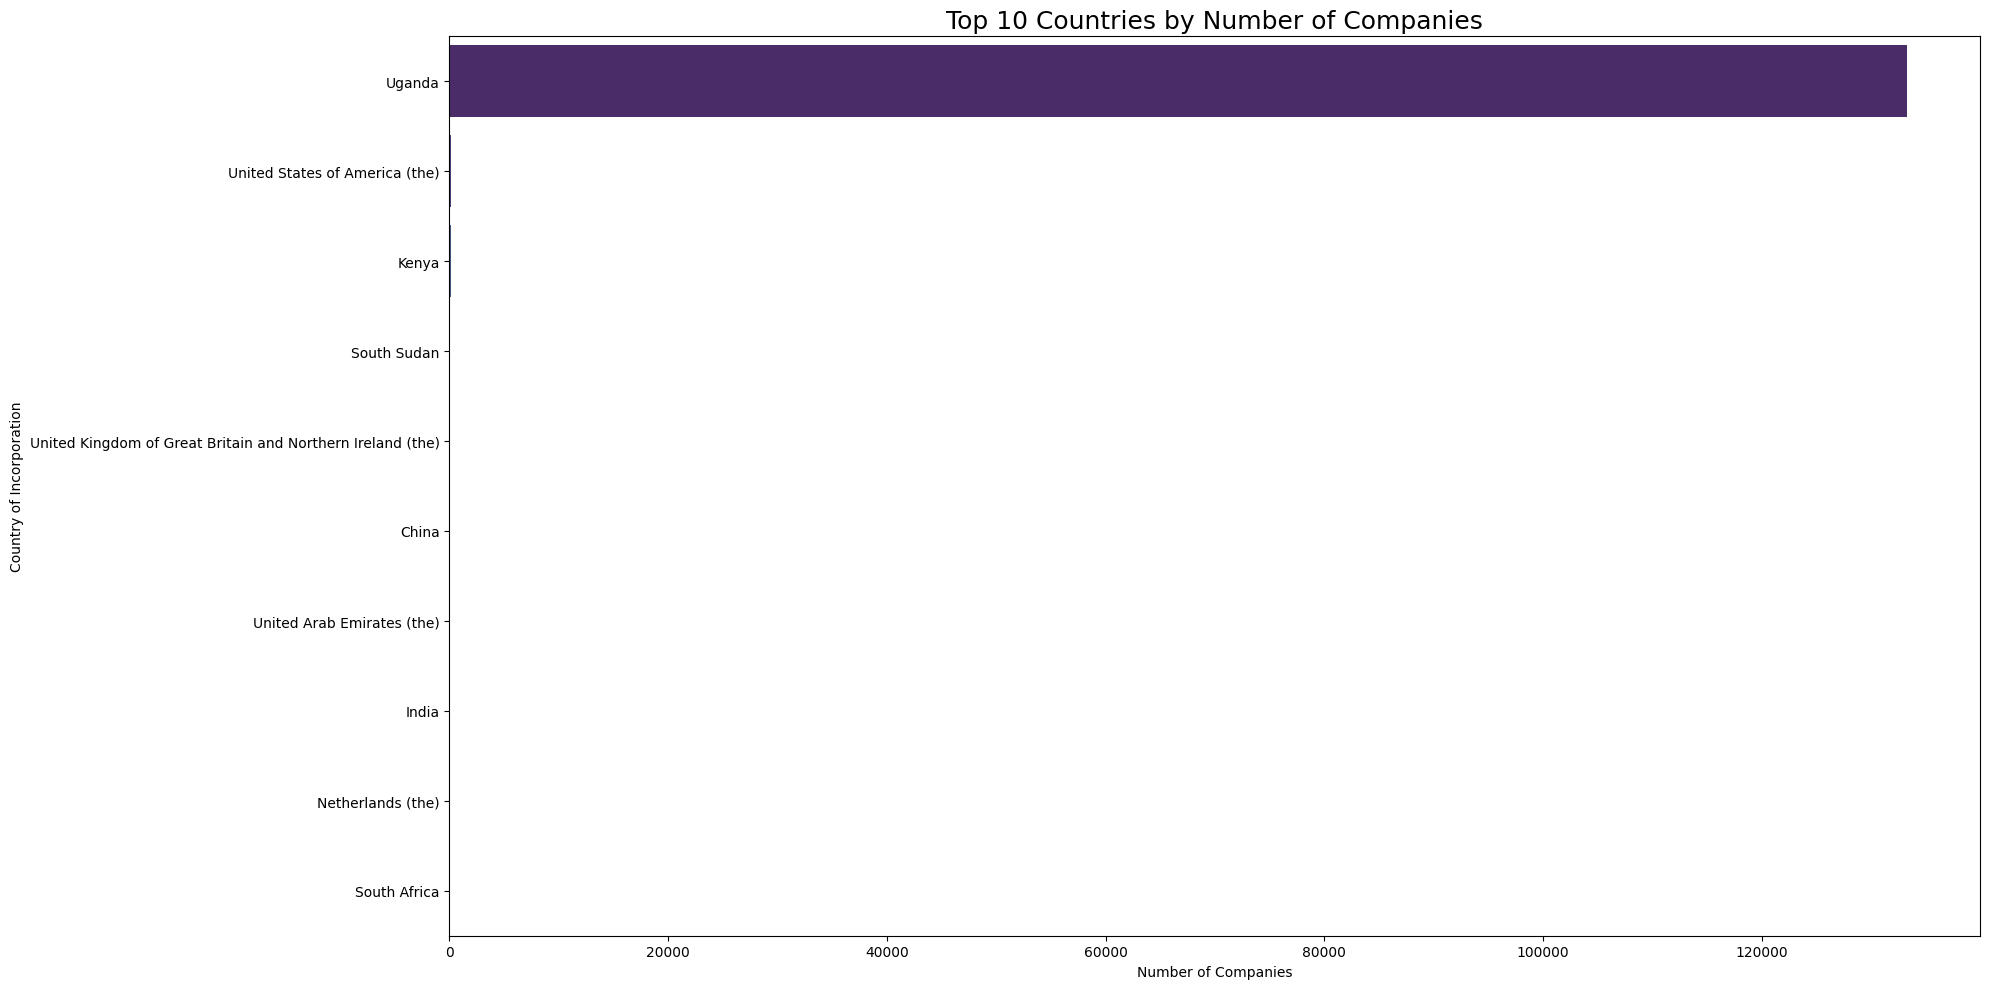

In [29]:
# Group by Country
country_counts = df1["Country Of Incorporation"].value_counts().reset_index()
country_counts.columns = ["Country Of Incorporation","Count"]

# Create the choropleth map
fig = px.choropleth(
    country_counts,
    locations="Country Of Incorporation",
    locationmode="country names",
    color="Count",
    hover_name="Country Of Incorporation",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Companies by Country of Incorporation"
)
fig.show()
fig.write_html("companies_map.html")
# Create a bar plot for the top 10 countries
top_10_countries = country_counts.nlargest(10, "Count")
plt.figure(figsize=(20, 10))
sns.barplot(data=top_10_countries, x="Count", y="Country Of Incorporation", palette="viridis")
plt.title("Top 10 Countries by Number of Companies", fontsize=18)
plt.xlabel("Number of Companies")
plt.ylabel("Country of Incorporation")
plt.tight_layout()
plt.show()


C:\Users\opg\AppData\Local\Temp\ipykernel_11996\67435220.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




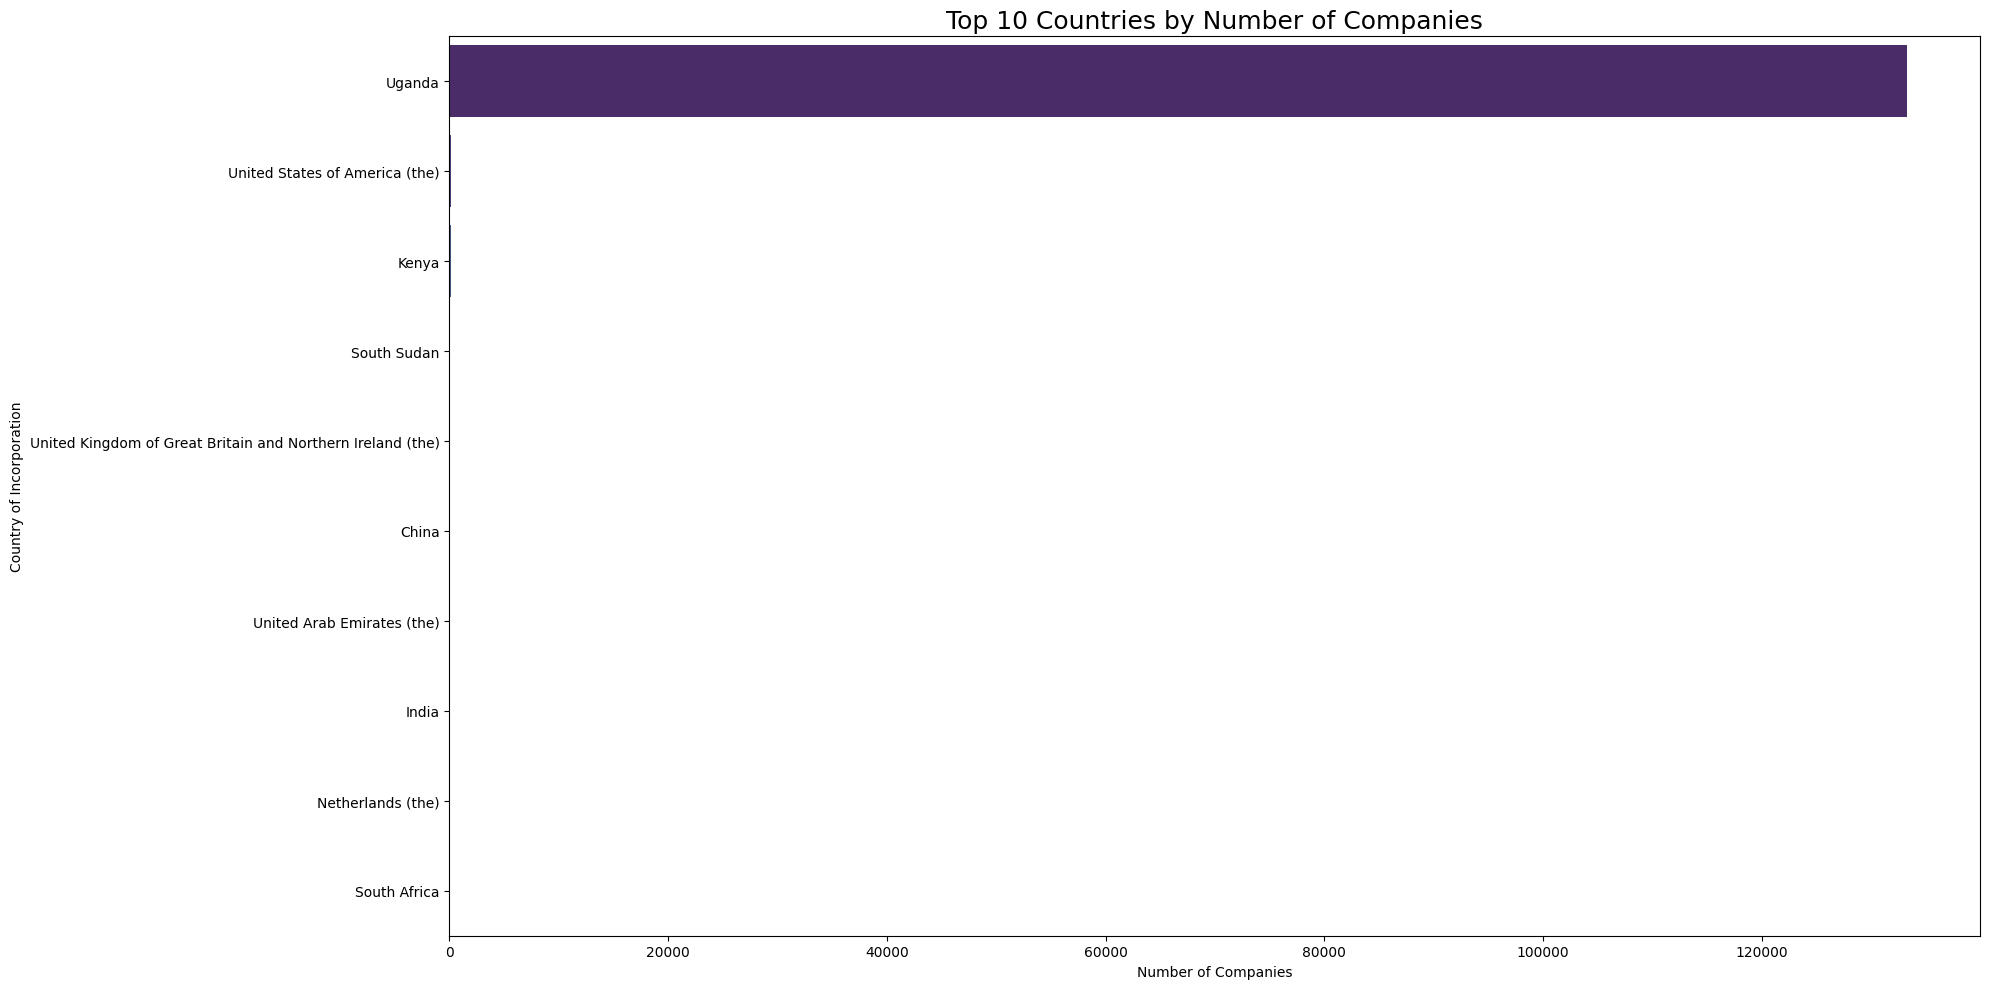

In [30]:
# Create a bar plot for the top 10 countries
top_10_countries = country_counts.nlargest(10, "Count")
plt.figure(figsize=(20, 10))
sns.barplot(data=top_10_countries, x="Count", y="Country Of Incorporation", palette="viridis")
plt.title("Top 10 Countries by Number of Companies", fontsize=18)
plt.xlabel("Number of Companies")
plt.ylabel("Country of Incorporation")
plt.tight_layout()
plt.show()

In [32]:
df1.dtypes

Date of Registration               datetime64[ns]
Company Type                               object
Registration Status                        object
Country Of Incorporation                   object
Nominal Share Capital                     float64
Number Of Shares                          float64
Re Registration Date               datetime64[ns]
Last Year Company Filed Returns           float64
dtype: object

C:\Users\opg\AppData\Local\Temp\ipykernel_11996\857227026.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




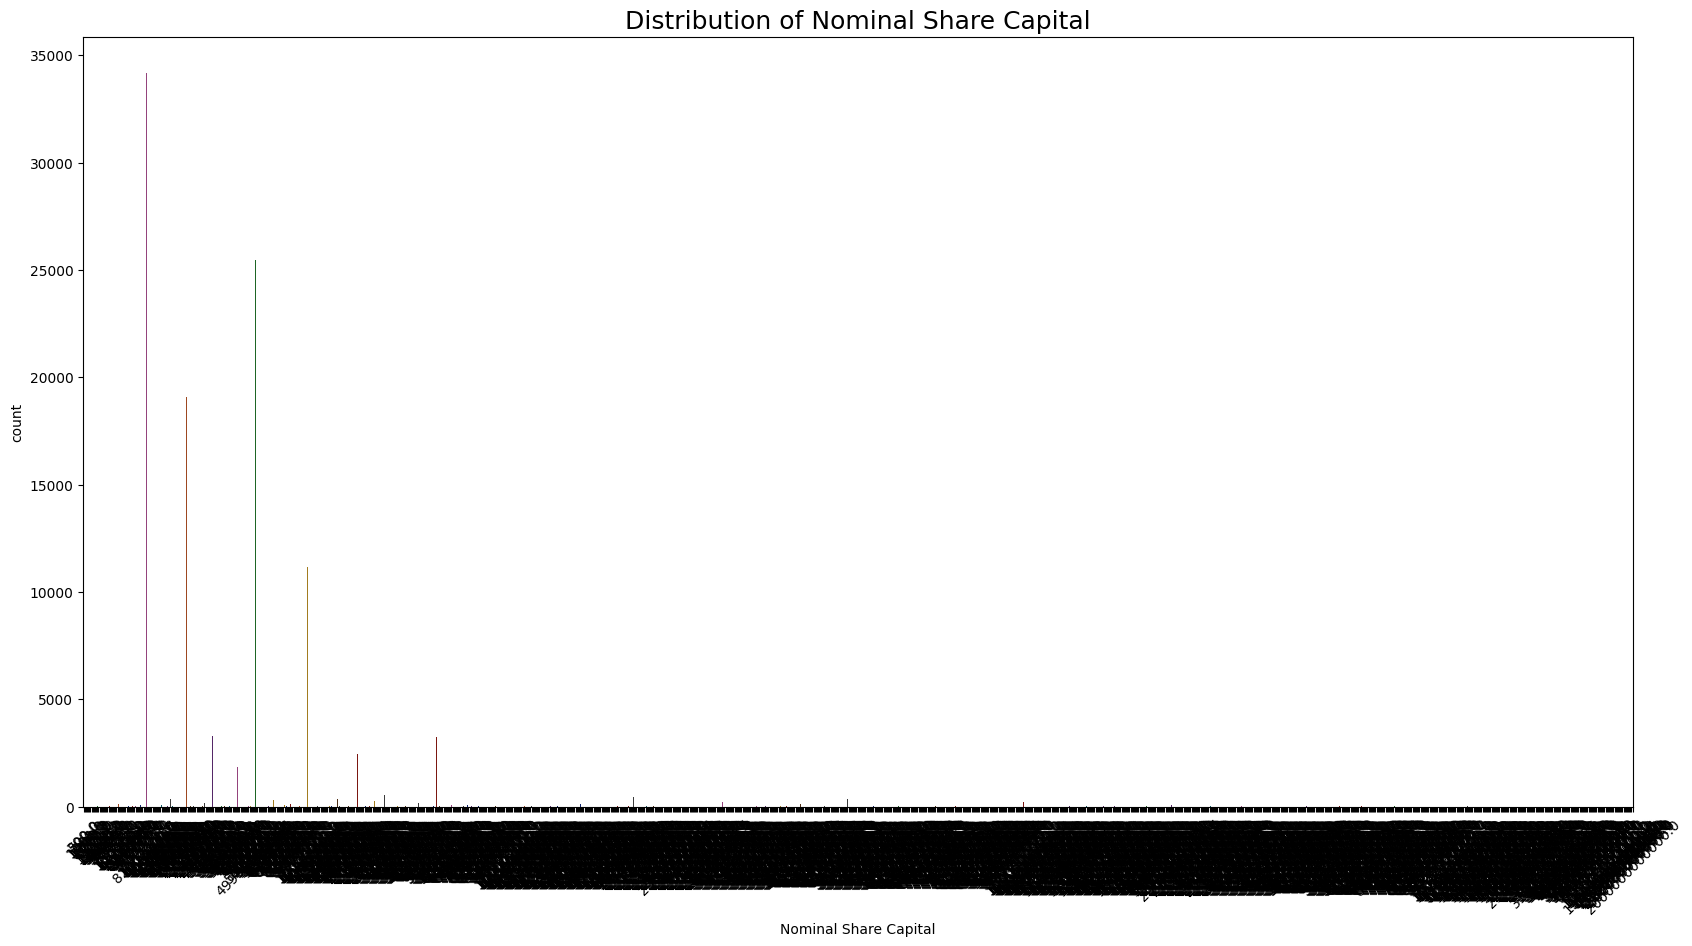

In [33]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Nominal Share Capital', data=df1, palette='dark')  # 'dark6' isn't a valid palette
plt.title("Distribution of Nominal Share Capital", fontsize=18)
plt.xticks(rotation=45)  # optional, helps if the labels are long
plt.show()


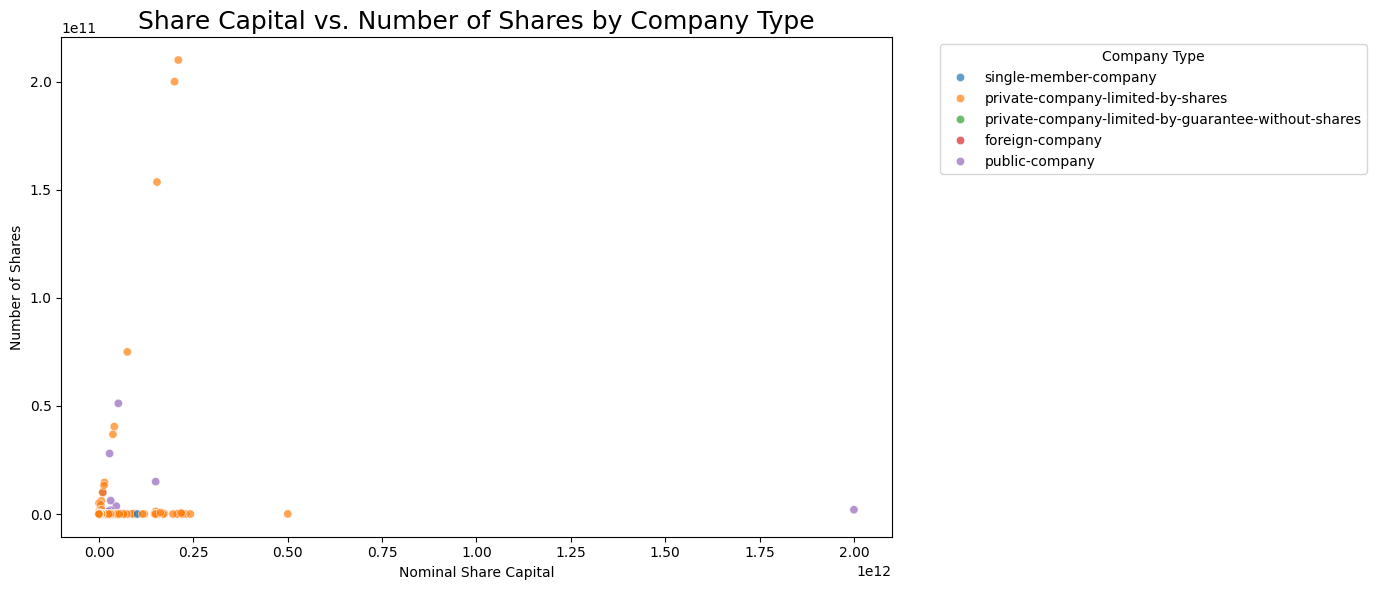

In [34]:
plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=df1,
    x="Nominal Share Capital",
    y="Number Of Shares",
    hue="Company Type",
    palette="tab10",
    alpha=0.7
)

plt.title("Share Capital vs. Number of Shares by Company Type", fontsize=18)
plt.xlabel("Nominal Share Capital")
plt.ylabel("Number of Shares")
plt.legend(title="Company Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
